<a href="https://colab.research.google.com/github/divyanshsharma2003/Emotion_Classifier_Project/blob/main/Emotion_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
base_path = "/content/drive/My Drive/Emotion_classifier/"
train_file = base_path + "train.txt"
test_file = base_path + "test.txt"
val_file = base_path + "val.txt"

In [ ]:
train_df = pd.read_csv(train_file, sep=";", names = [ "Text", "Emotion"])
test_df = pd.read_csv(test_file, sep=";", names = [ "Text", "Emotion"])
val_df = pd.read_csv(val_file, sep=";", names = [ "Text", "Emotion"])

In [ ]:
df = pd.concat([train_df, test_df, val_df], ignore_index=True)
df["Text"].head()

,Text
0,i'm so mad at you right now
1,this is absolutely unacceptable
2,i can’t believe you did that
3,you never listen to me
4,this infuriates me beyond belief


In [ ]:
df["Emotion"].value_counts()

,count
Emotion,
joy,6761
sadness,5797
anger,2759
fear,2373
love,1641
surprise,719


#*Data Preprocessing*

In [ ]:
# !pip install neattext
import neattext.functions as nfx
# Removing Stop-words
df["CleanText"] = df["Text"].apply(nfx.remove_stopwords)

**Splitting into Target(Y) and Input Variables(X)**

In [ ]:
X = df["CleanText"]
Y = df["Emotion"]

**Splitting the dataset into Train (For Training) and Test (For Testing Model) Set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

**Training The Model**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe_lr = Pipeline([('tfidf',TfidfVectorizer()), ('clf', LogisticRegression())])
pipe_lr.fit(x_train, y_train)
pipe_lr.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8675810473815462

In [ ]:
# C=1(dafault) regularization parameter for tradeoff b/w Generalization and Low Training Error
pipe_svm = Pipeline([('tfidf', TfidfVectorizer()),('svc', SVC(kernel = 'linear', probability=True))])
pipe_svm.fit(x_train, y_train)
pipe_svm.score(x_test, y_test)

0.8830423940149625

**Accuracy & Confusion Matrix**

Accuracy : 0.88




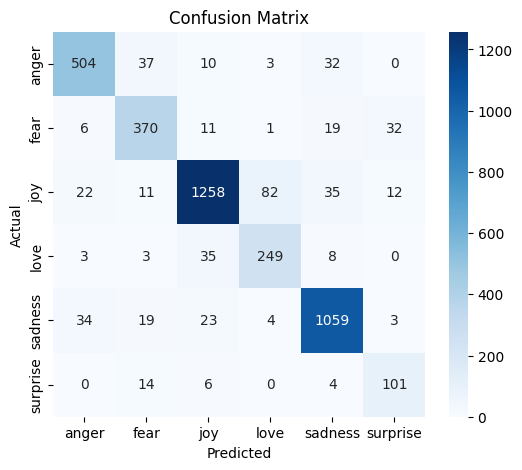

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting labels for Unseen (Test) data
y_pred = pipe_svm.predict(x_test)

# Calculating Accuracy Score
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy : {accuracy:.2f}\n\n")

# Generating Confusion Matrix
cm = confusion_matrix(y_pred,y_test)

# Plot Confusion Matrix using seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipe_lr.classes_, yticklabels=pipe_lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
plt.savefig("confusion_matrix.png")

**Saving The SVM model (More Accurate) For Further Use**

In [ ]:
import joblib
joblib.dump(pipe_svm, "svm_emotion_model.pkl")

# # Saving in my drive too
# joblib.dump(pipe_lr, '/content/drive/MyDrive/svm_emotion_model.pkl')

['/content/drive/MyDrive/svm_emotion_model.pkl']

In [ ]:
# # TESTING THE MODEL (Working Fine)
model = joblib.load('svm_emotion_model.pkl')
print(model.predict(["This is unacceptable"]))


['anger']
